In [11]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

In [12]:
X, y = mnist.data, mnist.target

In [14]:
X.shape

(70000, 784)

In [15]:
y.shape

(70000,)

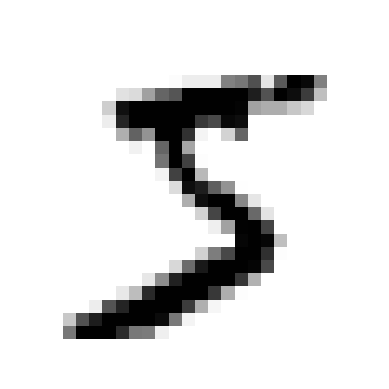

'5'

In [17]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap = 'binary')
    plt.axis('off')

some_digit = X[0]
plot_digit(some_digit)
plt.show()
y[0]

In [25]:
n = 60000
X_train, X_test, y_train, y_test = X[:n], X[n:], y[:n], y[n:]

In [46]:
# Data Augmentation 

from scipy.ndimage import shift
import numpy as np

def shift_image(image, dx, dy):
    return shift(image.reshape((28, 28)), [dy, dx], cval=0, mode='constant').reshape([-1])

shifts_to_make = [(0, 1), (1, 0), (0, -1), (-1, 0)]

X_train_aug = [image for image in X_train]  
y_train_aug = [label for label in y_train] 

for dx, dy in shifts_to_make:
    for image, label in zip(X_train, y_train):
        X_train_aug.append(shift_image(image, dx, dy))  
        y_train_aug.append(label)  

X_train_aug = np.array(X_train_aug)
y_train_aug = np.array(y_train_aug)

In [48]:
# Modelling 

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

models = { 
    "RandomForest": RandomForestClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "SVC": SVC(),
    "KNN": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier()
}

classification_reports = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_aug, y_train_aug) 
    y_pred = model.predict(X_test) 
    print(f"Evaluating {name}...")
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports[name] = report
    print(f"Classification report for {name}:\n{report}")

Training RandomForest...
